# Preprocesamiento de datos

## Importación de librerias

In [72]:
#Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from matplotlib import cm
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings("ignore")

## Carga de archivos

In [73]:
#Subimos el archivo csv a un dataframe
df = pd.read_csv(r"data\listings.csv")

In [74]:
#Leemos el archivo y comprobamos que se haya subido correctamente
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia Maria,Eixample,la Sagrada Família,41.405560,2.17262,Entire home/apt,179.0,1,45,2024-09-16,0.31,29,147,5,HUTB-002062
1,23197,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax",90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.412432,2.21975,Entire home/apt,251.0,3,82,2025-01-03,0.48,1,0,8,HUTB005057
2,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.17015,Entire home/apt,104.0,1,143,2025-03-04,0.86,3,107,31,HUTB-001722
3,34241,Stylish Top Floor Apartment - Ramblas Plaza Real,73163,Andres,Ciutat Vella,el Barri Gòtic,41.380620,2.17517,Entire home/apt,157.0,31,25,2024-11-05,0.14,3,327,15,Exempt
4,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,Andres,Ciutat Vella,el Barri Gòtic,41.379780,2.17623,Entire home/apt,401.0,5,256,2025-02-02,1.46,3,191,34,HUTB-150671


## PREPROCESAMIENTO DE DATOS

#### Cambio de tipos

In [75]:
df.dtypes #comprobamos los tipos de datos de las columnas del dataframe

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [76]:
#cambiamos lastreview de object a datetime
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

### Información del dataset

In [77]:
df.shape #dimensiones del dataframe

(19422, 18)

In [78]:
df.info() #informacion del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19422 entries, 0 to 19421
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              19422 non-null  int64         
 1   name                            19422 non-null  object        
 2   host_id                         19422 non-null  int64         
 3   host_name                       19415 non-null  object        
 4   neighbourhood_group             19422 non-null  object        
 5   neighbourhood                   19422 non-null  object        
 6   latitude                        19422 non-null  float64       
 7   longitude                       19422 non-null  float64       
 8   room_type                       19422 non-null  object        
 9   price                           15273 non-null  float64       
 10  minimum_nights                  19422 non-null  int64         
 11  nu

In [79]:
df.columns #columnas del dataframe

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

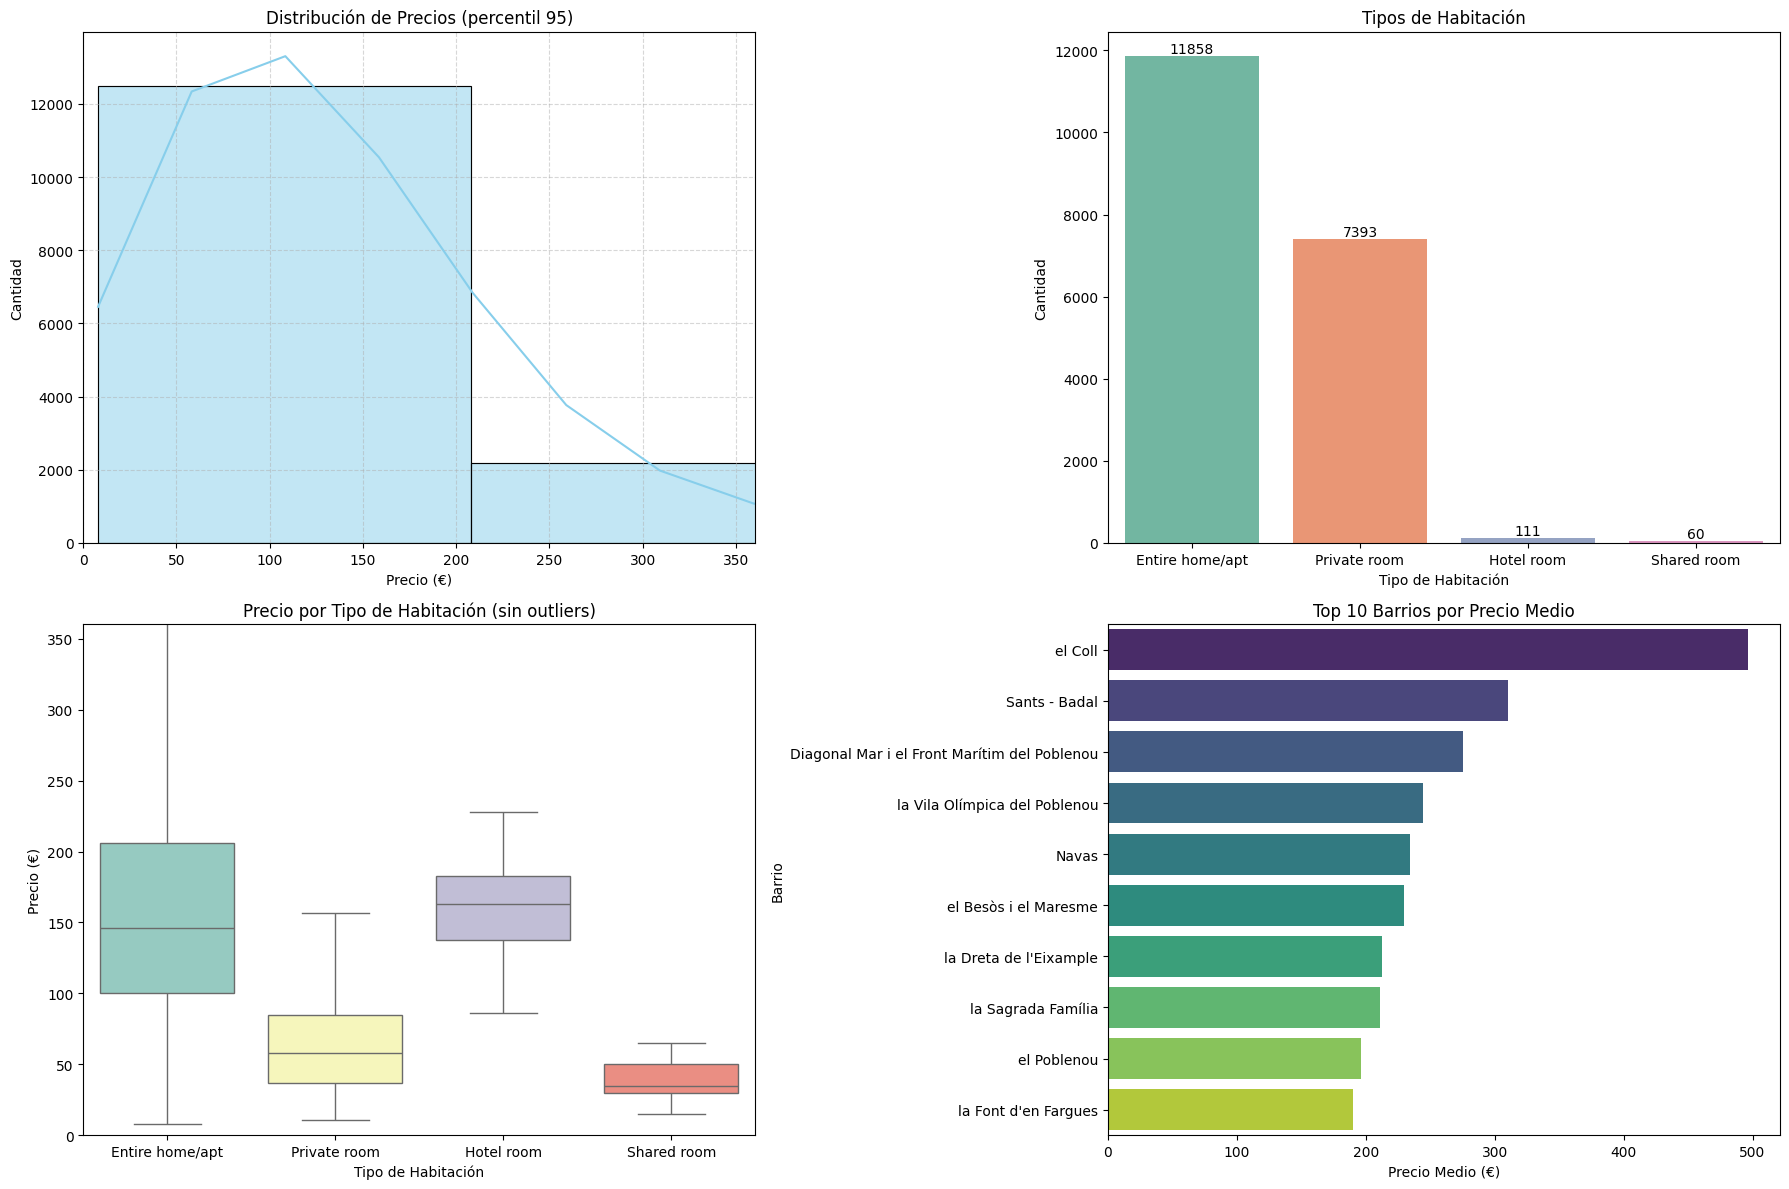

In [80]:
# Gráficos mejorados de análisis exploratorio (preview gráfico del dataset)

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Distribución de precios (sin outliers extremos)
sns.histplot(df['price'].dropna(), bins=50, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_xlim(0, df['price'].quantile(0.95))
axes[0, 0].set_title('Distribución de Precios (percentil 95)')
axes[0, 0].set_xlabel('Precio (€)')
axes[0, 0].set_ylabel('Cantidad')
axes[0, 0].grid(True, linestyle='--', alpha=0.5)

# 2. Conteo de tipos de habitación
sns.countplot(data=df, x='room_type', order=df['room_type'].value_counts().index, ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Tipos de Habitación')
axes[0, 1].set_xlabel('Tipo de Habitación')
axes[0, 1].set_ylabel('Cantidad')
for p in axes[0, 1].patches:
    axes[0, 1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                        ha='center', va='bottom', fontsize=10, color='black')

# 3. Boxplot de precios por tipo de habitación
sns.boxplot(data=df, x='room_type', y='price', ax=axes[1, 0], palette='Set3', showfliers=False)
axes[1, 0].set_ylim(0, df['price'].quantile(0.95))
axes[1, 0].set_title('Precio por Tipo de Habitación (sin outliers)')
axes[1, 0].set_xlabel('Tipo de Habitación')
axes[1, 0].set_ylabel('Precio (€)')

# 4. Media de precios por barrio (top 10)
top_neigh = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_neigh.values, y=top_neigh.index, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('Top 10 Barrios por Precio Medio')
axes[1, 1].set_xlabel('Precio Medio (€)')
axes[1, 1].set_ylabel('Barrio')

plt.tight_layout()
plt.show()

In [81]:
df.duplicated().sum() # Comprobamos si hay filas duplicadas en el dataframe

np.int64(0)

In [82]:
df.describe() #estadisticas del dataframe

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.942200e+04,1.942200e+04,19422.000000,19422.000000,15273.000000,19422.000000,19422.000000,14513,14513.000000,19422.000000,19422.000000,19422.000000
mean,5.340735e+17,2.011099e+08,41.392127,2.166932,161.542264,15.329266,49.729945,2024-03-23 00:39:23.453455104,1.444763,49.529812,161.790907,11.749923
min,1.867400e+04,3.073000e+03,41.335310,2.085593,8.000000,1.000000,0.000000,2011-06-23 00:00:00,0.010000,1.000000,0.000000,0.000000
25%,2.738201e+07,1.110253e+07,41.381070,2.156540,65.000000,1.000000,0.000000,2024-07-20 00:00:00,0.200000,2.000000,1.000000,0.000000
50%,6.010367e+17,1.308027e+08,41.389956,2.167670,117.000000,3.000000,6.000000,2025-01-16 00:00:00,0.780000,7.000000,174.000000,2.000000
75%,1.078802e+18,3.579465e+08,41.401590,2.177540,181.000000,31.000000,48.000000,2025-02-19 00:00:00,2.180000,34.000000,280.000000,15.000000
max,1.368966e+18,6.801697e+08,41.456377,2.221830,10000.000000,1124.000000,3091.000000,2025-03-11 00:00:00,79.120000,483.000000,365.000000,1239.000000
std,5.386541e+17,2.033453e+08,0.014056,0.017663,327.006539,27.679158,105.133092,NaN,2.006798,104.113008,130.780438,24.279234


In [83]:
df.isnull().sum() #comprobamos si hay valores nulos en el dataframe

id                                   0
name                                 0
host_id                              0
host_name                            7
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                             4149
minimum_nights                       0
number_of_reviews                    0
last_review                       4909
reviews_per_month                 4909
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           6222
dtype: int64

In [84]:
df.isnull().sum() / len(df) * 100 #comprobamos el porcentaje de valores nulos en el dataframe

id                                 0.000000
name                               0.000000
host_id                            0.000000
host_name                          0.036042
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                             21.362373
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       25.275461
reviews_per_month                 25.275461
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
license                           32.035836
dtype: float64

<Axes: >

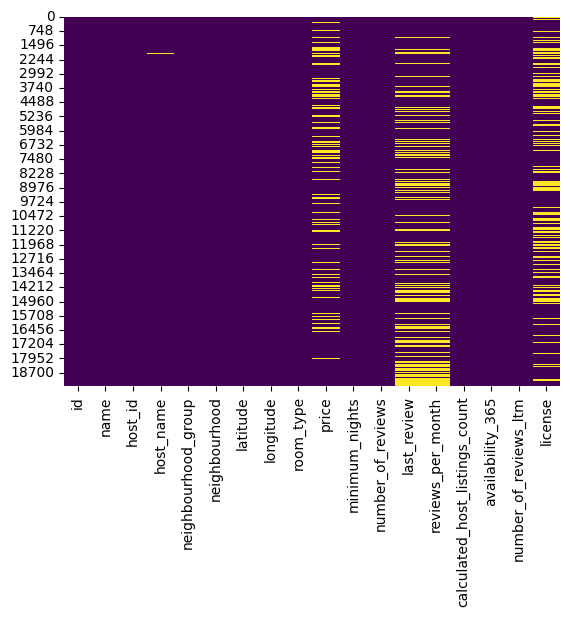

In [85]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis') #visualizamos los valores nulos en el dataframe

### Limpieza y reparación de datos

In [89]:
#creamos copia de df para no modificar el original
df_3 = df.copy()

##### Reparación nulos Host Name

In [104]:
# Reparamos los valores numlos de Host Name teniendo en cuenta el host ID
df_3['host_name'] = df_3['host_name'].fillna(df_3.groupby('host_id')['host_name'].transform('first'))

In [105]:
# No se corresponde ningun Host id con un Host Name, por lo que reemplazamos valores nulos con un "Sin datos"
df_3['host_name'] = df_3['host_name'].fillna('sin datos')

##### Reparación nulos License

In [108]:
# Reemplazamos los valores NaN en la columna 'license' por 'sin datos'
df_3['license'] = df_3['license'].fillna('sin datos')

##### Reparación nulos Price

In [96]:
# Reemplazamos los datos nulos de "price" basádandonos en el tipo de habitación y barrio
df_3['price'] = df_3.groupby(['room_type', 'neighbourhood'])['price'].transform(
    lambda x: x.fillna(x.median())
)


In [98]:
# Verificar cantidad de valores nulos en price
print(f"Valores nulos en price: {df_3['price'].isnull().sum()}")

Valores nulos en price: 5


In [99]:
# Reemplazamos el resto de los datos nulos de "price" con la mediana general
df_3['price'] = df_3['price'].fillna(df_3['price'].median())

##### Reparación nulos Reviews per month y Last Rewiew

In [ ]:
# Reemplazamos con 0 (lo más lógico ya que significa que no hay reseñas)
df_3['reviews_per_month'] = df_3['reviews_per_month'].fillna(0)

# Verificar resultado
print(f"Valores nulos en reviews_per_month después: {df_3['reviews_per_month'].isnull().sum()}")

Valores nulos en reviews_per_month después: 0


In [103]:
# Usamos una fecha que indique "sin reseñas" (por ejemplo, una fecha muy antigua)
fecha_sin_resenas = pd.to_datetime('1900-01-01')  # Fecha que indique claramente que no hay reseñas
df_3['last_review'] = df_3['last_review'].fillna(fecha_sin_resenas)

# Opción 2: Crear una columna categórica que indique si tiene reseñas
df_3['has_reviews'] = df_3['last_review'].notnull().astype(int)  # 1 si tiene reseñas, 0 si no

# Verificar resultado
print(f"Valores nulos en last_review después: {df_3['last_review'].isnull().sum()}")

Valores nulos en last_review después: 0


In [110]:
df_3.isnull().sum() / len(df_3) * 100 #comprobamos el porcentaje de valores nulos tras la limpieza

id                                0.0
name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
last_review                       0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
number_of_reviews_ltm             0.0
license                           0.0
has_reviews                       0.0
dtype: float64

### Nuevos datos

##### Añadimos nueva columna 